In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array,ImageDataGenerator

C:\Users\vcr03\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\vcr03\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\vcr03\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\vcr03\AppData\Roaming\Python\Python37\site-

In [6]:
from PIL import Image

In [7]:
from glob import glob

In [8]:
import cv2

In [9]:
from tensorflow.keras.utils import to_categorical

In [10]:
from tensorflow.keras.models import Sequential

In [11]:
from tensorflow.keras.layers import Dense , Dropout, Flatten , Conv2D,MaxPool2D, MaxPooling2D, BatchNormalization

In [12]:
from tensorflow.keras.preprocessing.image import array_to_img

In [13]:
from tensorflow.keras.optimizers import Adam

In [14]:
from tensorflow.keras.losses import BinaryCrossentropy

In [15]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [16]:
from tensorflow.keras.applications.vgg16 import VGG16

In [17]:
from sklearn.metrics import confusion_matrix 

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
from sklearn.preprocessing import LabelBinarizer

In [20]:
from sklearn.utils import shuffle

In [21]:
from imutils import paths

In [22]:
import os

In [23]:
from PIL import Image

In [24]:
from IPython.display import Image as DImage

In [25]:
from IPython.display import display

In [26]:
from IPython.core.display import HTML

In [27]:
def read_images(path,num_img):
    array=np.zeros((num_img,224,224,3))
    i=0
    for img in os.listdir(path):
        img_path=path + "/" + img
        img=Image.open(img_path,mode="r")
        data=np.asarray(img,dtype="uint8")
        array[i]=data
        i+=1
    return array

In [28]:
no_dr_path=r"Dataset/No_DR"
num_no_dr=len(glob("Dataset/No_DR/*"))
no_dr_array=read_images(no_dr_path,num_no_dr)
no_dr_array=no_dr_array.astype(np.uint8)

In [29]:
mild_path=r"Dataset/Mild"
num_mild=len(glob("Dataset/Mild/*"))
mild_array=read_images(mild_path,num_mild)
mild_array=mild_array.astype(np.uint8)

In [30]:
moderate_path=r"Dataset/Moderate"
num_moderate=len(glob("Dataset/Moderate/*"))
moderate_array=read_images(moderate_path,num_moderate)
moderate_array=moderate_array.astype(np.uint8)

In [31]:
proliferate_dr_path=r"Dataset/Proliferate_DR"
num_proliferate_dr=len(glob("Dataset/Proliferate_DR/*"))
proliferate_dr_array=read_images(proliferate_dr_path,num_proliferate_dr)
proliferate_dr_array=proliferate_dr_array.astype(np.uint8)

In [32]:
severe_path =r"Dataset/Severe"
num_severe=len(glob("Dataset/Severe/*"))
severe_array=read_images(severe_path,num_severe)
severe_array=severe_array.astype(np.uint8)

In [33]:
print("no_dr_array",no_dr_array.shape)

no_dr_array (1805, 224, 224, 3)


In [34]:
print("mild_array",mild_array.shape)

mild_array (370, 224, 224, 3)


In [35]:
print("moderate_array",moderate_array.shape)

moderate_array (999, 224, 224, 3)


In [36]:
print("proliferate_dr_array",proliferate_dr_array.shape)

proliferate_dr_array (295, 224, 224, 3)


In [37]:
print("severe_array",severe_array.shape)

severe_array (193, 224, 224, 3)


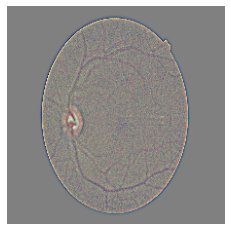

In [38]:
plt.imshow(no_dr_array[1])
plt.axis("off")
plt.show()

In [39]:
print("no_dr_array dtype is",no_dr_array.dtype)

no_dr_array dtype is uint8


In [40]:
print("mild_array dtype is",mild_array.dtype)

mild_array dtype is uint8


In [41]:
print("moderate_array dtype is",moderate_array.dtype)

moderate_array dtype is uint8


In [42]:
print("proliferate_dr_array dtype is",proliferate_dr_array.dtype)

proliferate_dr_array dtype is uint8


In [43]:
print("severe_array dtype is",severe_array.dtype)

severe_array dtype is uint8


In [44]:
print("num_no_dr:",num_no_dr)

num_no_dr: 1805


In [45]:
print("num_mild:",num_mild)

num_mild: 370


In [46]:
print("num_moderate:",num_moderate)

num_moderate: 999


In [47]:
print("num_proliferate_dr:",num_proliferate_dr)

num_proliferate_dr: 295


In [48]:
print("num_severe:",num_severe)

num_severe: 193


In [49]:
imagePaths = list(paths.list_images('Dataset'))


In [50]:
imagePaths

['Dataset\\Mild\\0024cdab0c1e.png',
 'Dataset\\Mild\\00cb6555d108.png',
 'Dataset\\Mild\\0124dffecf29.png',
 'Dataset\\Mild\\01b3aed3ed4c.png',
 'Dataset\\Mild\\0369f3efe69b.png',
 'Dataset\\Mild\\03e25101e8e8.png',
 'Dataset\\Mild\\04ac765f91a1.png',
 'Dataset\\Mild\\059bc89df7f4.png',
 'Dataset\\Mild\\05a5183c92d0.png',
 'Dataset\\Mild\\0684311afdfc.png',
 'Dataset\\Mild\\06b71823f9cd.png',
 'Dataset\\Mild\\07929d32b5b3.png',
 'Dataset\\Mild\\07a1c7073982.png',
 'Dataset\\Mild\\086d41d17da8.png',
 'Dataset\\Mild\\09935d72892b.png',
 'Dataset\\Mild\\0a3202889f4d.png',
 'Dataset\\Mild\\0a61bddab956.png',
 'Dataset\\Mild\\0ad7f631dedb.png',
 'Dataset\\Mild\\0d310aba6373.png',
 'Dataset\\Mild\\0dc031c94225.png',
 'Dataset\\Mild\\0dce95217626.png',
 'Dataset\\Mild\\0eb52045349f.png',
 'Dataset\\Mild\\0f495d87656a.png',
 'Dataset\\Mild\\0fb1053285cf.png',
 'Dataset\\Mild\\101b9ebfc720.png',
 'Dataset\\Mild\\107aea0d9289.png',
 'Dataset\\Mild\\10f36b0239fb.png',
 'Dataset\\Mild\\1116271db4e

In [51]:
width,height=224,224

In [52]:
data = []
labels = []

In [53]:
for imagePath in imagePaths:
    label = imagePath.split(os.path.sep)[-2]   
    image = load_img(imagePath, target_size=(width, height))
    image = img_to_array(image)
    data.append(image)
    labels.append(label)

In [54]:
data = np.array(data, dtype="float32")
labels = np.array(labels)

In [55]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [56]:
lb.classes_

array(['Mild', 'Moderate', 'No_DR', 'Proliferate_DR', 'Severe', 'predict'],
      dtype='<U14')

In [57]:
data, labels = shuffle(data, labels)

In [58]:
print(data.shape)
print(labels.shape)

(3664, 224, 224, 3)
(3664, 6)


In [59]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=.2)

In [60]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=.2)

In [61]:
def create_model() -> None:
    model = Sequential()
    model.add(Conv2D(8, (3,3), padding="valid", input_shape=(224,224,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Conv2D(16,(3,3), padding="valid",activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Conv2D(32,(4,4),padding="valid",activation='relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dense(32,activation='relu'))
    model.add(Dropout(0.15))
    model.add(Dense(6,activation='sigmoid'))
    return model

In [62]:
model = create_model()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [63]:
model.compile(optimizer = Adam(learning_rate=1e-5), loss = BinaryCrossentropy(),metrics=['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [64]:
es = EarlyStopping(monitor='val_loss',min_delta=0,patience=5,verbose=0,mode='auto',)

In [65]:
es1 = ModelCheckpoint(r'./model{epoch:08d}-{acc}.h5', save_freq=5)

In [66]:
def plot_curves(history):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    accuracy = history.history["acc"]
    val_accuracy = history.history["val_acc"]
    epochs = range(len(history.history["loss"]))

    plt.plot(epochs, loss, label = "training_loss")
    plt.plot(epochs, val_loss, label = "val_loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()

    plt.figure() 
    plt.plot(epochs, accuracy, label = "training_accuracy")
    plt.plot(epochs, val_accuracy, label = "val_accuracy")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()

In [67]:
history = model.fit(x_train , y_train , epochs=50 , batch_size=64,
                    validation_data=(x_val,y_val), verbose=1 , callbacks = [es,es1])

Train on 2344 samples, validate on 587 samples
Epoch 1/50
2344/2344 [==============================] - 33s 14ms/sample - loss: 0.6926 - acc: 0.6294 - val_loss: 1.7198 - val_acc: 0.4929
Epoch 2/50
2344/2344 [==============================] - 36s 15ms/sample - loss: 0.4050 - acc: 0.8358 - val_loss: 1.0235 - val_acc: 0.4284
Epoch 3/50
2344/2344 [==============================] - 34s 14ms/sample - loss: 0.3373 - acc: 0.8663 - val_loss: 0.6197 - val_acc: 0.6147
Epoch 4/50
2344/2344 [==============================] - 32s 14ms/sample - loss: 0.3057 - acc: 0.8791 - val_loss: 0.3894 - val_acc: 0.8541
Epoch 5/50
2344/2344 [==============================] - 32s 14ms/sample - loss: 0.2920 - acc: 0.8860 - val_loss: 0.2981 - val_acc: 0.8969
Epoch 6/50
2344/2344 [==============================] - 32s 14ms/sample - loss: 0.2823 - acc: 0.8904 - val_loss: 0.2596 - val_acc: 0.9094
Epoch 7/50
2344/2344 [==============================] - 32s 14ms/sample - loss: 0.2722 - acc: 0.8921 - val_loss: 0.2442 - val

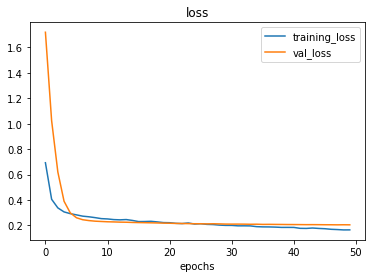

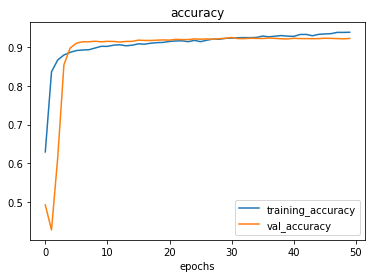

In [68]:
plot_curves(history)

# score = model.evaluate(x_test,y_test)

In [69]:
predictions=["Mild","Moderate","NO_DR","Proliferate_DR","Severe"] 

In [70]:
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)

In [71]:
def predict_new(path):
    img = cv2.imread(path)

    RGBImg = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    RGBImg= cv2.resize(RGBImg,(224,224))
    plt.imshow(RGBImg)
    image = np.array(RGBImg) / 255.0

    predict=model.predict(np.array([image]))
    print(predict)
    pred=np.argmax(predict,axis=1)
    print(pred)
    print(f"Predicted: {predictions[pred[0]]}")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0 0 1 0 0 0]
Prediction: NO_DR


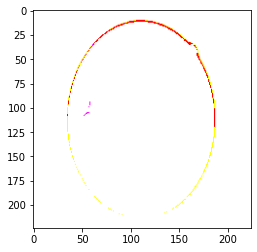

In [72]:
index =np.random.randint(1, len(x_test))
img = x_test[index]
RGBImg = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
RGBImg= cv2.resize(RGBImg,(224,224))

plt.imshow(RGBImg)
print(y_test[index])
print(f"Prediction: {predictions[pred[index]]}")

In [73]:
Vgg16 = VGG16(include_top=False, input_shape= (224,224,3)) 
Vgg16.trainable=False

[[0.2839101  0.97299236 0.00682189 0.06394861 0.9854305  0.58574075]]
[4]
Predicted: Severe


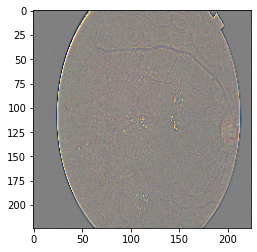

In [74]:
predict_new("Dataset/Moderate/000c1434d8d7.png")

In [76]:
model = create_tr_model()

NameError: name 'create_tr_model' is not defined

In [ ]:
def create_tr_model():
    model = Sequential()
    model.add(Vgg16)
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(64 , activation="relu"))
    model.add(Dropout(0.25))
    model.add(Dense(32 , activation="relu"))
    model.add(Dense(6, activation="sigmoid"))
    return model

In [ ]:
model.compile( optimizer="adam" , loss = BinaryCrossentropy(),metrics=['acc'])

In [ ]:
model.summary()

In [ ]:
history = model.fit(x_train , y_train , epochs=5 , batch_size=32,
                    validation_data=(x_val,y_val), verbose=1 , callbacks = [es])

In [ ]:
plot_curves(history)

In [ ]:
score = model.evaluate(x_test,y_test)

In [ ]:
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)

In [ ]:
x_test

In [ ]:
index =np.random.randint(1, len(x_test))
img = x_test[index]
plt.imshow(img)
print(y_test[index])
print(f"Prediction: {predictions[pred[index]]}")

In [ ]:
predict_new("Dataset/Moderate/000c1434d8d7.png")